<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/HW3/happiness_solutionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2 Assignment 2:

Following the work we did together on the youtube videos and movies datasets, explore this dataset of "world happiness".
This is a free form assignment: all the tasks have been performed in the _youtube videos_ or _movies_ data exploration we did in class (see class lectures and associated notebooks, also see Assignment 1 in HW 2).

Find the datast happines.csv in
https://github.com/fedhere/FDSfE_FBianco


On your own, perform the following tasks and report the results (with neat print statemnets as done in https://github.com/fedhere/FDSfE_FBianco/blob/main/HW2/movies_exploratory_instructions.ipynb, and remember that _all_ figures need axis labels and figure captions).

- find the shape of the dataframe
- show the top _10 rows_ and bottom _10 rows_ of the dataframe (_done in the videos and movies exploration_)
- find statistical properties of the numerical columns of the dataframe (mean, standard deviation, quantiles etc)  (_done in the videos and movies exploration_)
- inspect if the dataframe has missing values (_done in the movies exploration_). If it does have any decide how to deal with them: you can remove the rows or columns with missing values (with _drop_ or _dropna_ as we did in the movies assignment, but make sure you do not need them to answer the following questions before you drop them!), or replace them with some value that you thin is appropriate, for example with with _fillna_, see instructions on this function [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)). The choice of how to deal with missing values is yours, but you do have to end up with a dataframe with no missing values (make sure you show that the resulting dataframe has no missing values either with a printed output or with a plot).
- find the happiest country.
- is the happiest country also the top country in any of the following variables: [Economy (GDP per Capita),	Family	Health, (Life Expectancy),	Freedom	Trust (Government Corruption),Generosity	Dystopia Residual]

- find the happiness score for a country of your choice, for example your country of origin, or any country you like. We did not do this exact task in either notebook _but_ to do that you can use a condition like `df["Happiness Score"] == "mycountry"` - this is similar to what you did to get the maximum value for a country: `df["Happiness Score"] == df["Happiness Score"].max()` and then use this statement as an index for the dataframe).

- find the top 10 happiest coutries (using the `sort_values` function like we did in class for the videos analysis - _done in the videos and movies exploration_)
- measure the correlation among (numerical) variables (_done in the videos and movies exploration_)
- show a plot of the correlation of (numerical) variables (we did it in a couple of different ways in the youtube videos notebook) and describe it in a caption - what do you see? any noticeable correlations or anticorrelations? (_done in the videos and movies exploration_)
THE LAST TWO TASKS ARE A BIT HARDER BECAUSE WE DID NOT DO ThEM TOGETHER IN CLASS SO THEY ARE GUIDED BELOW
- aggregate the countries by region with `_group_by()` (_done in the videos and movies exploration_) and find the region with the highest "Generosity")


REMEMBER:
- for each plot make a caption that states "what" and "why" (see HW2 assignment 1) and make sure the plots have appropriate axis labels.
- for every "finding" make sure the result is clear, for example by clearly extracting it in a print statement or by writing a text cell below the core that shows the result
- save your notebook on Github in your FDSfE repository as HW1_happiness.ipynb


In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
happiness15 = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/happines.csv")


- find the shape of the dataframe

In [ ]:
print("the shape of the dataframe is", happiness15.shape)

the shape of the dataframe is (160, 12)



- show the top _10 rows_ and bottom _10 rows_ of the dataframe (_done in the videos and movies exploration_)


In [ ]:
happiness15.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [ ]:
happiness15.tail()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
157,Togo,Sub-Saharan Africa,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015
158,Namibia,NaN,4.639,NaN,0.87900,NaN,0.47700,0.40100,0.05600,0.07000,NaN,2019
159,Gambia,NaN,4.516,NaN,0.30800,NaN,0.42800,0.38200,0.16700,0.26900,NaN,2019


- find statistical properties of the numerical columns of the dataframe (mean, standard deviation, quantiles etc)  (_done in the videos and movies exploration_)

In [ ]:
happiness15.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,160.000000,158.000000,160.000000,158.000000,160.000000,160.000000,160.000000,160.000000,158.000000,160.000000
mean,5.365756,0.047885,0.842979,0.991046,0.628037,0.428151,0.143023,0.236448,2.098977,2015.050000
std,1.141280,0.017146,0.402840,0.272369,0.246332,0.149803,0.119492,0.126605,0.553550,0.445805
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,4.517750,0.037268,0.539453,0.856823,0.437897,0.328630,0.061067,0.148800,1.759410,2015.000000
50%,5.203000,0.043940,0.901085,1.029510,0.695745,0.434635,0.107220,0.216130,2.095415,2015.000000
75%,6.193250,0.052300,1.155523,1.214405,0.809837,0.547057,0.179565,0.307547,2.462415,2015.000000
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2019.000000



- inspect if the dataframe has missing values (_done in the movies exploration_). If it does have any decide how to deal with them: you can remove the rows or columns with missing values (with _drop_ or _dropna_ as we did in the movies assignment, but make sure you do not need them to answer the following questions before you drop them!), or replace them with some value that you thin is appropriate, for example with with _fillna_, see instructions on this function [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)). The choice of how to deal with missing values is yours, but you do have to end up with a dataframe with no missing values (make sure you show that the resulting dataframe has no missing values either with a printed output or with a plot).


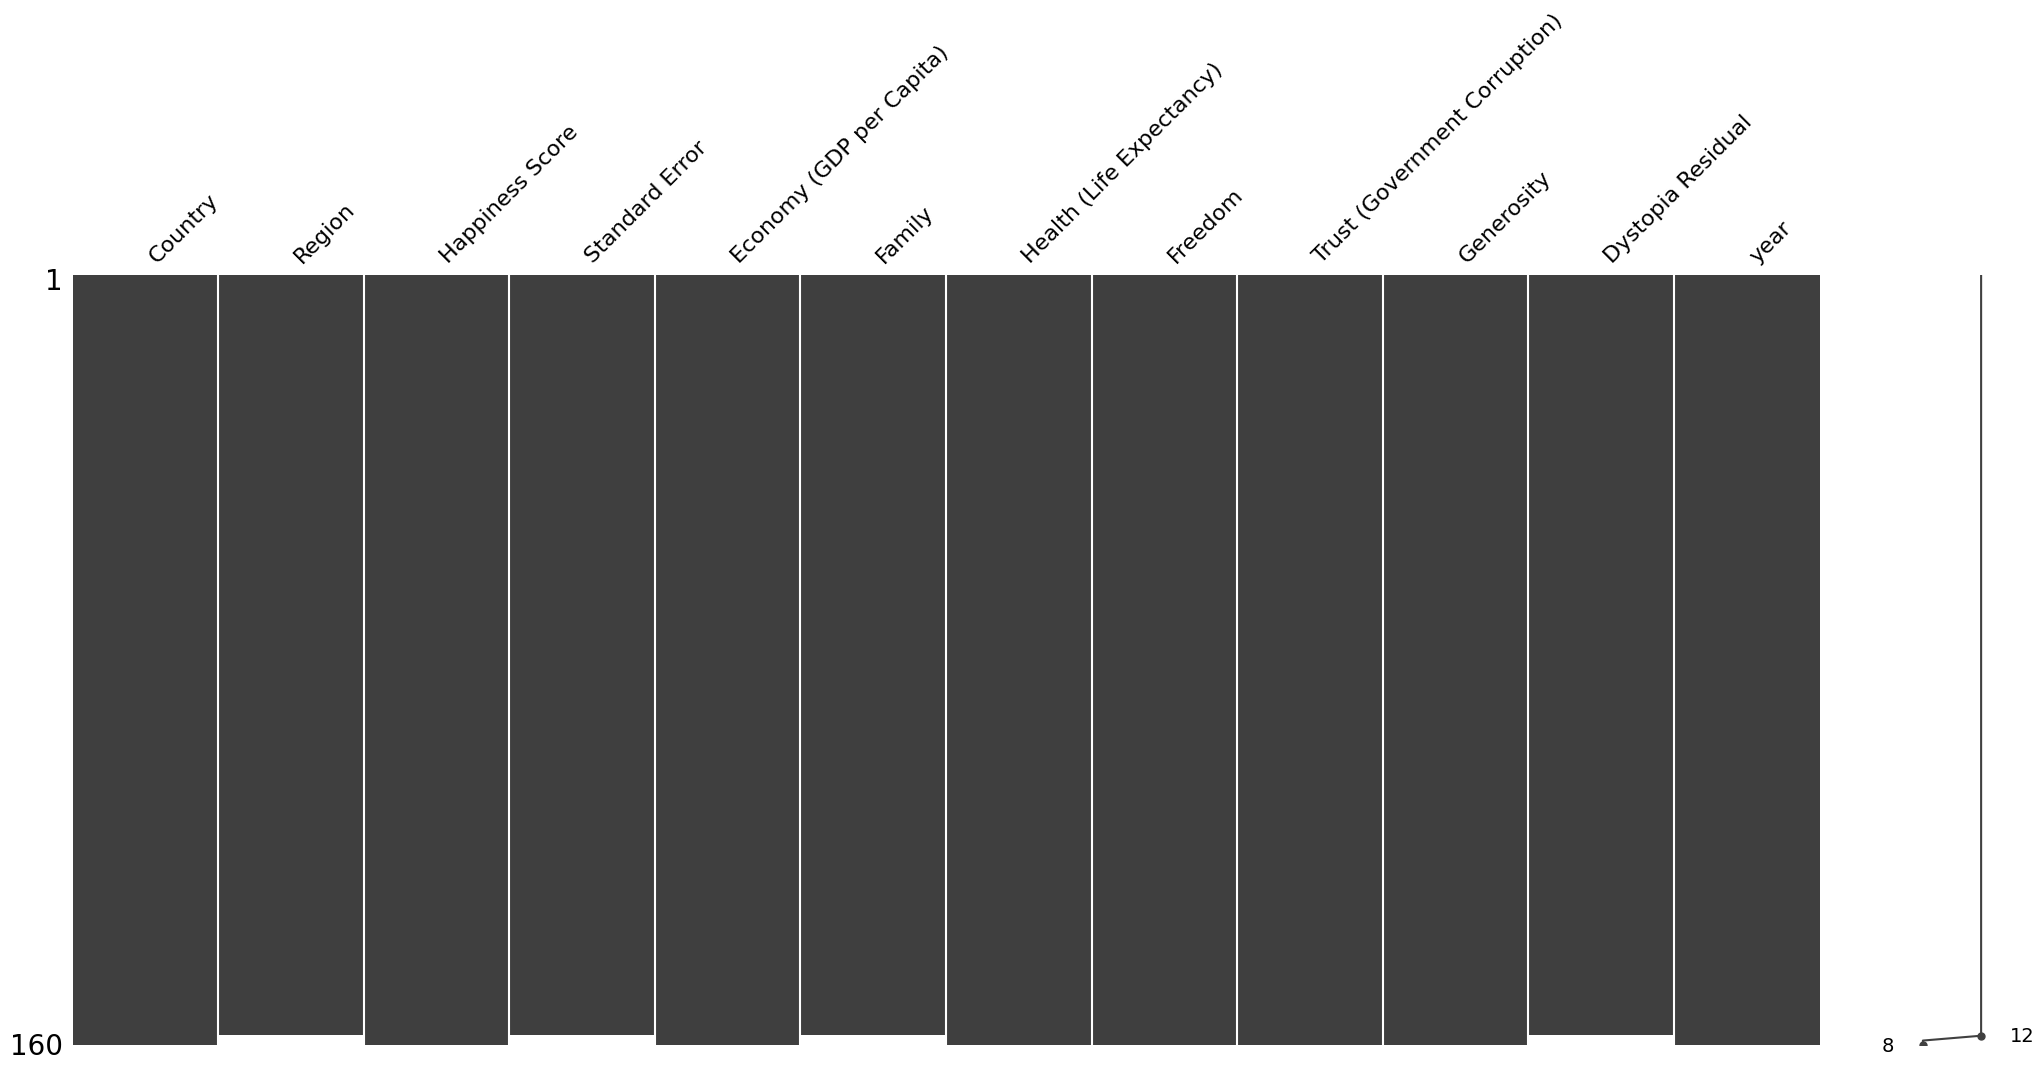

In [ ]:
import missingno as msno
msno.matrix(happiness15);

Figure 1: the graphic shows the missing values in the dataset. Each block represents a feature in the dataset. All missing values are in the later entries, represented as white (missing) blocks at the bottom of the columns. The sparkline graph on the right shows the missing values per datapoint (country) and indicated that up to 4 features are missing out of the 12 existing features. The fraction of missing values is small and likely will not compromise the analysis significantly.


In [ ]:
happiness15.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,2015.0
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.0
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.0
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,2015.0
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,2015.0
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,2015.0
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2015.0


In [ ]:
happiness15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        160 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                160 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       160 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       160 non-null    float64
 7   Freedom                        160 non-null    float64
 8   Trust (Government Corruption)  160 non-null    float64
 9   Generosity                     160 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  year                           160 non-null    int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Smiliarly, we see columns with as few as 158 and as many as 160 values: only two country miss observations.

In [ ]:
print("number of missinv values per column")
happiness15.isna().sum()

number of missinv values per column


Country                          0
Region                           2
Happiness Score                  0
Standard Error                   2
Economy (GDP per Capita)         0
Family                           2
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                2
year                             0
dtype: int64

This view confirms the previous statement: two countries are missing Rgion, Standard Error, Family, and Dystopia Residual values

# DROP MISSING VARIABLES (by row)

In [ ]:
shape_old = happiness15.shape
happiness15.dropna(axis=0, how="any", inplace=True)
print("we lost {}% of the observations by dropping each row with NaN's".format(
    ((shape_old[0] - happiness15.shape[0]) / shape_old[0]) * 100))

we lost 1.25% of the observations by dropping each row with NaN's


- find the happiest country.

In [ ]:
happiest = happiness15[happiness15["Happiness Score"] == happiness15["Happiness Score"].max()]
print("The happiest country is", happiest["Country"].values[0])
print("The highest happiness score is", happiness15[happiness15["Happiness Score"] ==
                                             happiness15["Happiness Score"].max()]["Happiness Score"].values[0])

The happiest country is Switzerland
The highest happiness score is 7.587



- is the happiest country also the top country in any of the following variables: [Economy (GDP per Capita),	Family	Health, (Life Expectancy),	Freedom	Trust (Government Corruption),Generosity	Dystopia Residual]


In [ ]:
print(happiness15.max())

Country                                Zimbabwe
Region                           Western Europe
Happiness Score                           7.587
Standard Error                          0.13693
Economy (GDP per Capita)                1.69042
Family                                  1.40223
Health (Life Expectancy)                1.02525
Freedom                                 0.66973
Trust (Government Corruption)           0.55191
Generosity                              0.79588
Dystopia Residual                       3.60214
year                                       2015
dtype: object


In [ ]:
happiness15.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')

In [ ]:
for c in ['Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']:
  if happiest[c].values[0] < happiness15[c].max():
    print(happiest["Country"].values[0], "is not the top country in",
          c)
  else:
    print(happiest["Country"].values[0], "is the top country in", c)


Switzerland is the top country in Happiness Score
Switzerland is not the top country in Economy (GDP per Capita)
Switzerland is not the top country in Family
Switzerland is not the top country in Health (Life Expectancy)
Switzerland is not the top country in Freedom
Switzerland is not the top country in Trust (Government Corruption)
Switzerland is not the top country in Generosity
Switzerland is not the top country in Dystopia Residual


find the happiness score for a country of your choice, for example your country of origin, or any country you like. We did not do this exact task in either notebook but to do that you can use a condition like df["Happiness Score"] == "mycountry" - this is similar to what you did to get the maximum value for a country: df["Happiness Score"] == df["Happiness Score"].max() and then use this statement as an index for the dataframe).



In [ ]:
happiness15[happiness15.Country == "Italy"]["Happiness Score"]

49    5.948
Name: Happiness Score, dtype: float64

find the top 10 happiest coutries (using the sort_values function like we did in class for the videos analysis - done in the videos and movies exploration)


In [ ]:
print("top 10 happiest countries")
happiness15.sort_values(by="Happiness Score", ascending=False)[:10]

top 10 happiest countries


,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015



measure the correlation among (numerical) variables (done in the videos and movies exploration)


In [ ]:
print('Correlationo of numerical variables related to "happiness"')
happiness15.corr()

Correlationo of numerical variables related to "happiness"


<ipython-input-18-861d4c5cba45>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happiness15.corr()


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,NaN
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,NaN
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,NaN
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,NaN
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,NaN
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,NaN
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,NaN
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,NaN
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


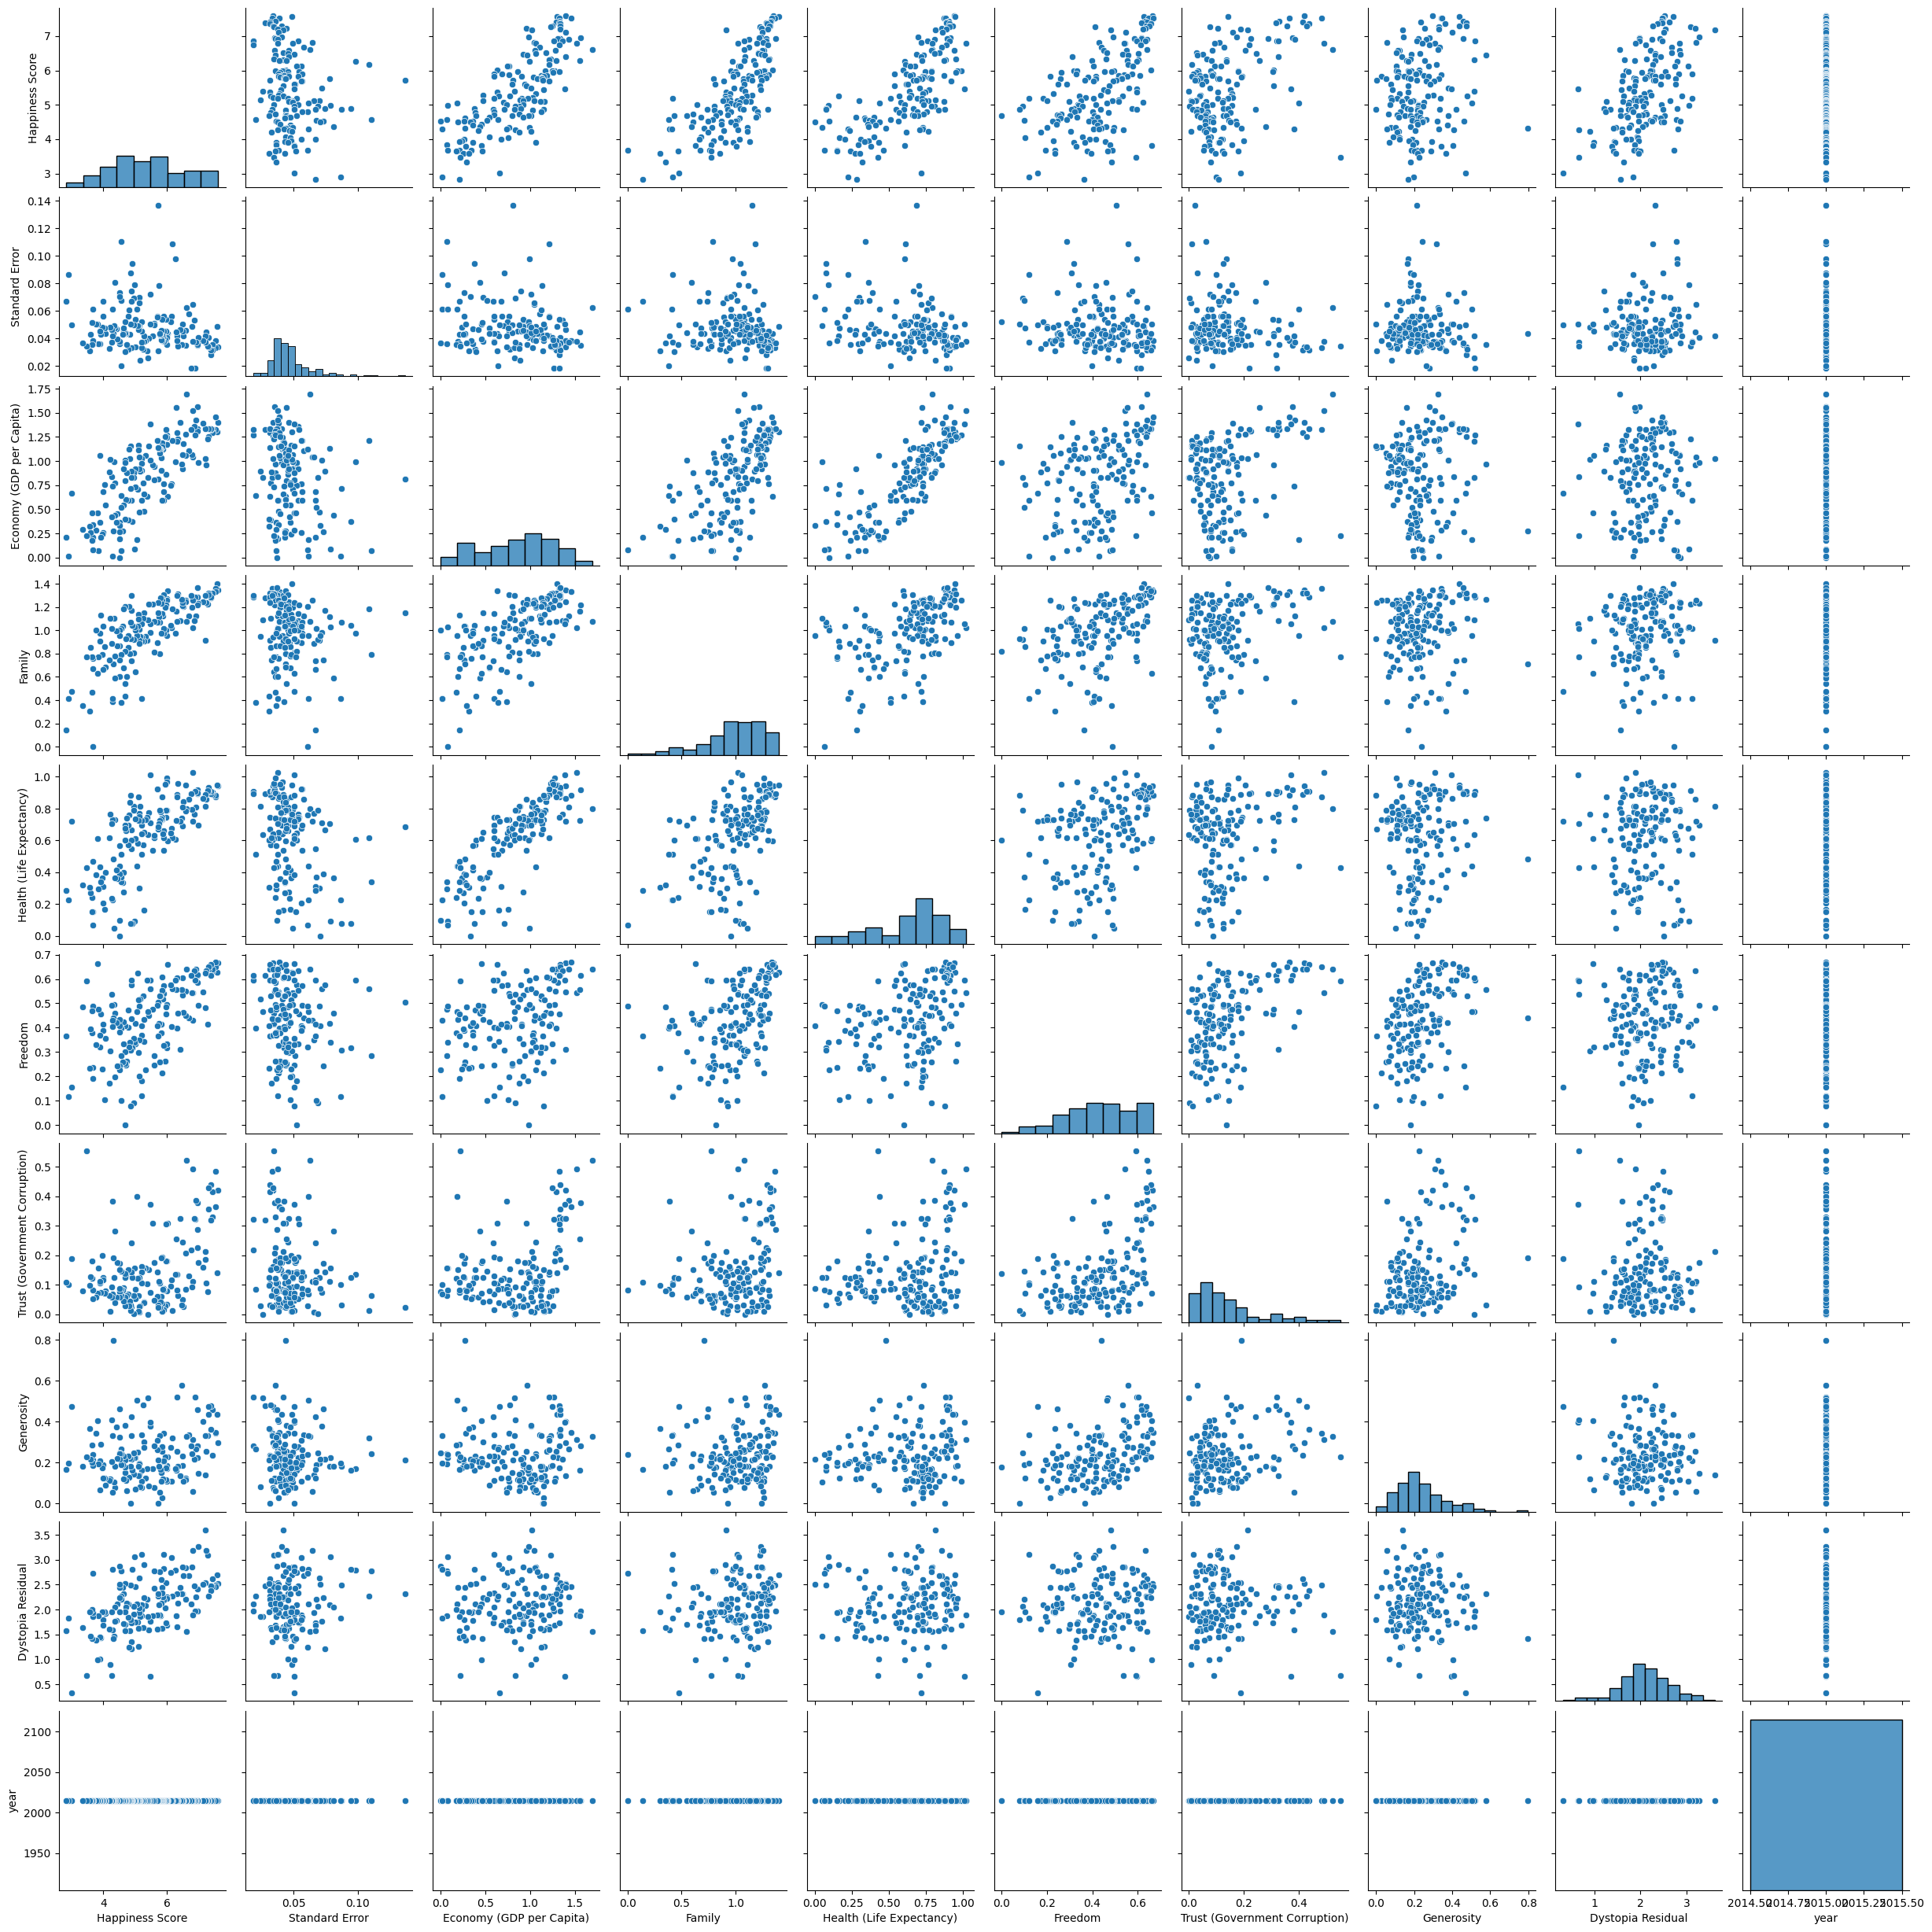

In [ ]:
sns.pairplot(happiness15);

Figure 2: this pairwise plot shoes the correlation between pairs of features (off diagonal entries) as a scatter plot and the distribution of each feature (diagonal entries) as a histogram. Notable correlation is seem between Happiness Score (our target) and Economy (GDP per Capita) and Family. Trust, and Generosity (as well as Standard Error on the happyness score) show right-skewed distributions with long tails, Family shows a left skewed distribution (more countries with large average family size). Dystopian Residuals appear bell shaped and very symmetric. The distribution of years is also shown, but this is a nuisance variable as all data is for 2015.

the groupby method of a dataframe allows you to group rows based on having the same value for a specified column. It returhs a `groupby object` which is not super helpful. But you can apply methods to that object, such as a mean(), or coun() to figure out what is the mean of each row for the group, or how many objects are in each group.

the syntax is
`df.groupby("column name").mean()`
and
`df.groupby("column name").count()`

for a dataframe called `df` and the column called "column name"

When you apply the method (mean or count or many others as well!) to the groupby object the return of that method is a dataframe itseld, with the same columns as the original dataframe, but one row per group and the values in each celled generated by the method you used applied to each row.

Try and get the mean generosity per world region (adapting the lines of code I gave you above), then sort the dataframe that results from this by Generosity and find the most generose region of the world.

- aggregate the countries by region with `_group_by()` (_done in the videos and movies exploration_) and find the region with the highest "Generosity")

In [ ]:
print("The happiest region is")
happiness15.groupby("Region").mean().sort_values(by=["Generosity"],
                                                 ascending=False)[:1]

The happiest region is


<ipython-input-20-2f533a9a39fa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  happiness15.groupby("Region").mean().sort_values(by=["Generosity"],


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
Region,,,,,,,,,,
Australia and New Zealand,7.285,0.03727,1.29188,1.31445,0.919965,0.64531,0.392795,0.455315,2.265355,2015.0


In [ ]:
from scipy import stats


In [ ]:
stats.ks_2samp(happiness15["Generosity"], happiness15["Generosity"])

KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.0, statistic_sign=1)

Now look at your correlation results, take the two columns tha have the largest correlation, and calculate the KS test for those. What can you say about them?

because they are the same, the p-value is 1, or maximum: it is statistically not possible that they are drawn from different populations


In [ ]:
stats.ks_2samp(happiness15["Happiness Score"], happiness15["Generosity"])

KstestResult(statistic=1.0, pvalue=3.340399673037736e-94, statistic_location=0.79588, statistic_sign=-1)

the p-value is very small, smaller than our 0.05 threshold, so we can reject the Null hypothesis that the distributions are drawn from the same population